### Curve Fitting with Scipy

In [1]:
## first the imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

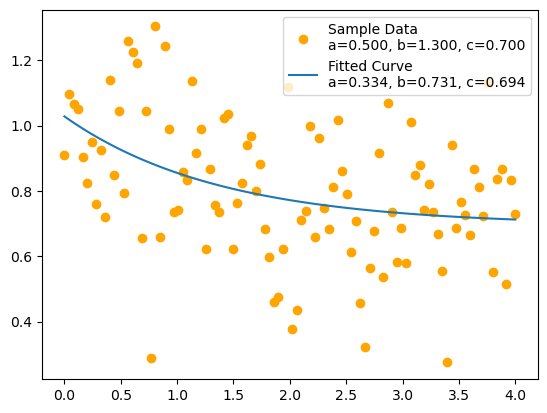

In [11]:
## generating some random data

## first defining a func for y
def y_func(x, a, b, c):
    return a * np.exp(-b*x) + c
## creating some data for x
X = np.linspace(0, 4, 100)
a, b, c = (0.5, 1.3, .7)
y = y_func(X, a, b, c)
## adding some noise to our data
y_noise = 0.2 * np.random.normal(size = X.size)
y = y + y_noise

## plotting the data
plt.scatter(X, y, label='Sample Data \na=%5.3f, b=%5.3f, c=%5.3f'%(a, b, c), color ='orange')

##curve fitting 
popt, pcov = curve_fit(y_func, X, y)

## and then adding the fitted curve to the plot
plt.plot(X, y_func(X, *popt), label = 'Fitted Curve \na=%5.3f, b=%5.3f, c=%5.3f'%tuple(popt))
plt.legend();

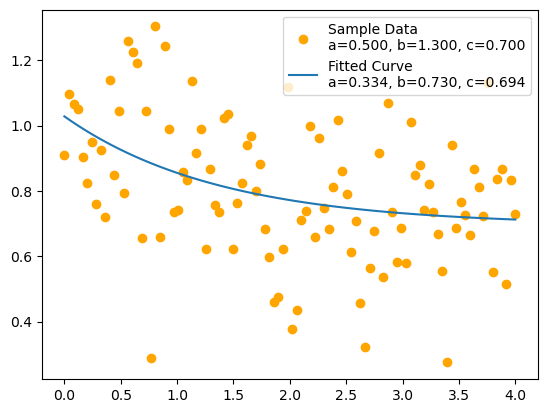

In [15]:
## now trying to have some constraints for our variables
## say 0<=a<=0.7, 0<=b<=1.5, 0<=c<=0.9
popt, pcov = curve_fit(y_func, X, y, bounds=(0, [.7,1.5,.9]))
## plot the new estimates
plt.scatter(X, y, label='Sample Data \na=%5.3f, b=%5.3f, c=%5.3f'%(a,b,c), color='orange')
plt.plot(X, y_func(X, *popt), label='Fitted Curve \na=%5.3f, b=%5.3f, c=%5.3f'%tuple(popt))
plt.legend();

### Testing with Gaussian Distribution

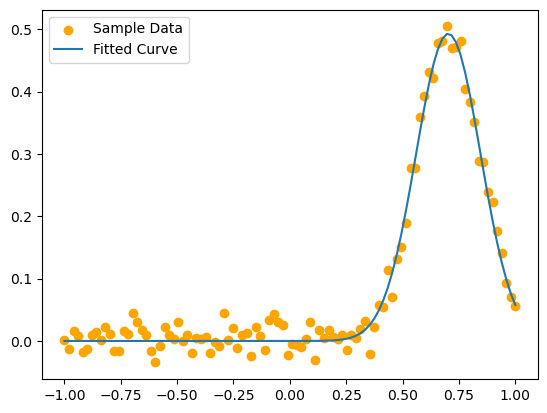

In [19]:
## the y funtion - Gaussian Dist
def gd(x, a, b, c):
    return a * np.exp((-(x-b)**2)/(c**2))
## generating some data 
X = np.linspace(-1, 1, 100)
a, b, c = (.5, .7, .2)
y = gd(X, a, b, c)
## adding some noise
y_noise = 2e-2 * np.random.normal(size=X.size)
y = y + y_noise

## plotting the data
plt.scatter(X, y, label='Sample Data', color= 'orange')

## fitting the curve
popt, pconv = curve_fit(gd, X, y)

## plotting the fitted curve
plt.plot(X, gd(X, *popt), label = 'Fitted Curve')
plt.legend();